In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
import re

In [2]:
data = pd.read_excel('arcgis_ngas_usak_v02.xlsx')
df = data.copy()

In [3]:
def getting_primary_info(df):
    print("------------------------------------------------------")
    print("Veri setinin şekli", df.shape)
    print("------------------------------------------------------")
    print("Veri seti değişken tipleri:\n", df.dtypes)
    print("------------------------------------------------------")
    print("Veri setinin ilk 5 satırı")
    display(HTML(df.head().to_html()))
    print("------------------------------------------------------")
    print("Veri setinin istatistiki verileri")
    description = df.describe()
    display(HTML(description.to_html()))
    print("------------------------------------------------------")  
getting_primary_info(df)

------------------------------------------------------
Veri setinin şekli (231623, 28)
------------------------------------------------------
Veri seti değişken tipleri:
 Year            int64
Jan usd/tr    float64
Feb usd/tr    float64
Mar usd/tr    float64
Apr usd/tr    float64
May usd/tr    float64
Jun usd/tr    float64
Jul usd/tr    float64
Aug usd/tr    float64
Sep usd/tr    float64
Oct usd/tr    float64
Nov usd/tr    float64
Dec usd/tr    float64
longitude     float64
latitude      float64
Jan           float64
Feb           float64
Mar           float64
Apr           float64
May           float64
Jun           float64
Jul           float64
Aug           float64
Sep           float64
Oct           float64
Nov           float64
Dec           float64
Total         float64
dtype: object
------------------------------------------------------
Veri setinin ilk 5 satırı


,Year,Jan usd/tr,Feb usd/tr,Mar usd/tr,Apr usd/tr,May usd/tr,Jun usd/tr,Jul usd/tr,Aug usd/tr,Sep usd/tr,Oct usd/tr,Nov usd/tr,Dec usd/tr,longitude,latitude,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,2015,2.3449,2.4236,2.5187,2.6008,2.7109,2.6762,2.6992,2.7736,2.9147,3.0174,2.8035,2.8923,29.435552,38.655245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,2.3449,2.4236,2.5187,2.6008,2.7109,2.6762,2.6992,2.7736,2.9147,3.0174,2.8035,2.8923,29.404893,38.666263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,2.3449,2.4236,2.5187,2.6008,2.7109,2.6762,2.6992,2.7736,2.9147,3.0174,2.8035,2.8923,29.386129,38.678564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,2.3449,2.4236,2.5187,2.6008,2.7109,2.6762,2.6992,2.7736,2.9147,3.0174,2.8035,2.8923,29.416003,38.682545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,2.3449,2.4236,2.5187,2.6008,2.7109,2.6762,2.6992,2.7736,2.9147,3.0174,2.8035,2.8923,29.402495,38.638435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


------------------------------------------------------
Veri setinin istatistiki verileri


,Year,Jan usd/tr,Feb usd/tr,Mar usd/tr,Apr usd/tr,May usd/tr,Jun usd/tr,Jul usd/tr,Aug usd/tr,Sep usd/tr,Oct usd/tr,Nov usd/tr,Dec usd/tr,longitude,latitude,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
count,231623.000000,231623.000000,231623.000000,231623.000000,231623.000000,231623.000000,231623.000000,231623.000000,231623.000000,231623.000000,231623.00000,231623.000000,231623.000000,231623.000000,231623.000000,231605.000000,226788.000000,226788.000000,226788.000000,226788.000000,226788.000000,231605.000000,231609.000000,231609.000000,229040.000000,230497.000000,231614.000000,231623.000000
mean,2016.648847,3.218489,3.301640,3.293438,3.326757,3.364186,3.531916,3.530348,3.652933,4.154344,4.03256,3.955177,3.976242,29.442662,38.666164,209.014843,179.090962,157.672002,108.200035,54.868535,29.817219,19.221901,13.915936,17.306077,31.741801,89.416352,177.484162,1075.878524
std,1.109379,0.538237,0.552588,0.510438,0.558533,0.584172,0.750087,0.769689,0.863947,1.609658,1.27269,1.105374,0.862284,0.504281,0.174727,578.209334,514.053764,437.981137,310.418353,377.841919,123.498323,120.343786,101.881970,117.572908,174.838247,326.488347,529.789055,2819.396466
min,2015.000000,2.344900,2.423600,2.518700,2.600800,2.710900,2.676200,2.699200,2.773600,2.914700,3.00360,2.803500,2.892300,27.047201,36.363464,0.000000,0.000000,0.000000,0.000000,-35094.431305,0.000000,0.000000,0.000000,0.000000,0.000000,-41.000000,0.000000,-18715.000000
25%,2016.000000,2.942200,2.967100,2.945100,2.819700,2.792800,2.948900,2.884600,2.979700,2.955800,3.01740,3.098100,3.448300,29.392015,38.662318,21.700000,13.350000,20.990000,15.070000,10.180000,6.440000,0.000000,0.000000,0.000000,8.100000,15.570000,39.250000,332.130000
50%,2017.000000,3.533800,3.756700,3.631300,3.637500,3.534800,3.531200,3.530500,3.516900,3.426400,3.57570,3.808000,3.932400,29.400218,38.669544,168.190000,142.120000,118.145000,73.730000,27.850000,18.370000,11.900000,8.100000,10.720000,17.170000,50.440000,134.100000,829.800000
75%,2018.000000,3.765200,3.774600,3.808200,3.957700,4.120800,4.592200,4.622500,4.922300,6.621300,5.96590,5.570400,5.190600,29.409796,38.677271,274.060000,241.380000,197.282500,141.350000,61.040000,32.290000,21.060000,16.200000,18.990000,30.280000,106.530000,212.210000,1290.935000
max,2018.000000,3.765200,3.774600,3.808200,3.957700,4.120800,4.592200,4.622500,4.922300,6.621300,5.96590,5.570400,5.190600,42.762756,41.957470,76901.930000,89923.880000,47445.010000,35362.669096,136327.593595,16407.000000,26148.243576,19204.090000,18423.180000,21769.695697,39532.730000,70454.020000,315300.260000


------------------------------------------------------


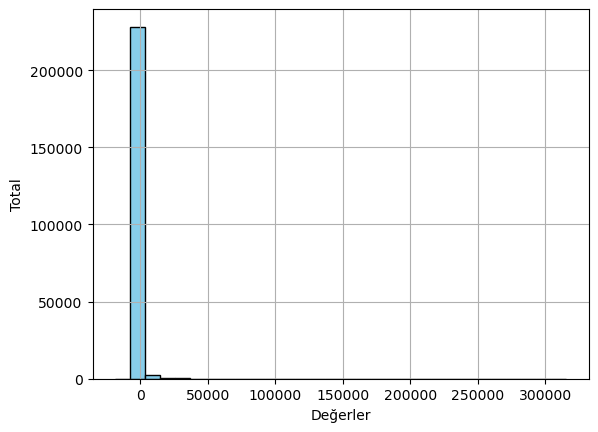

In [4]:
plt.hist(df["Total"], bins=30, color='skyblue', edgecolor='black') 
plt.xlabel('Değerler')
plt.ylabel('Total')
plt.grid(True)
plt.show()

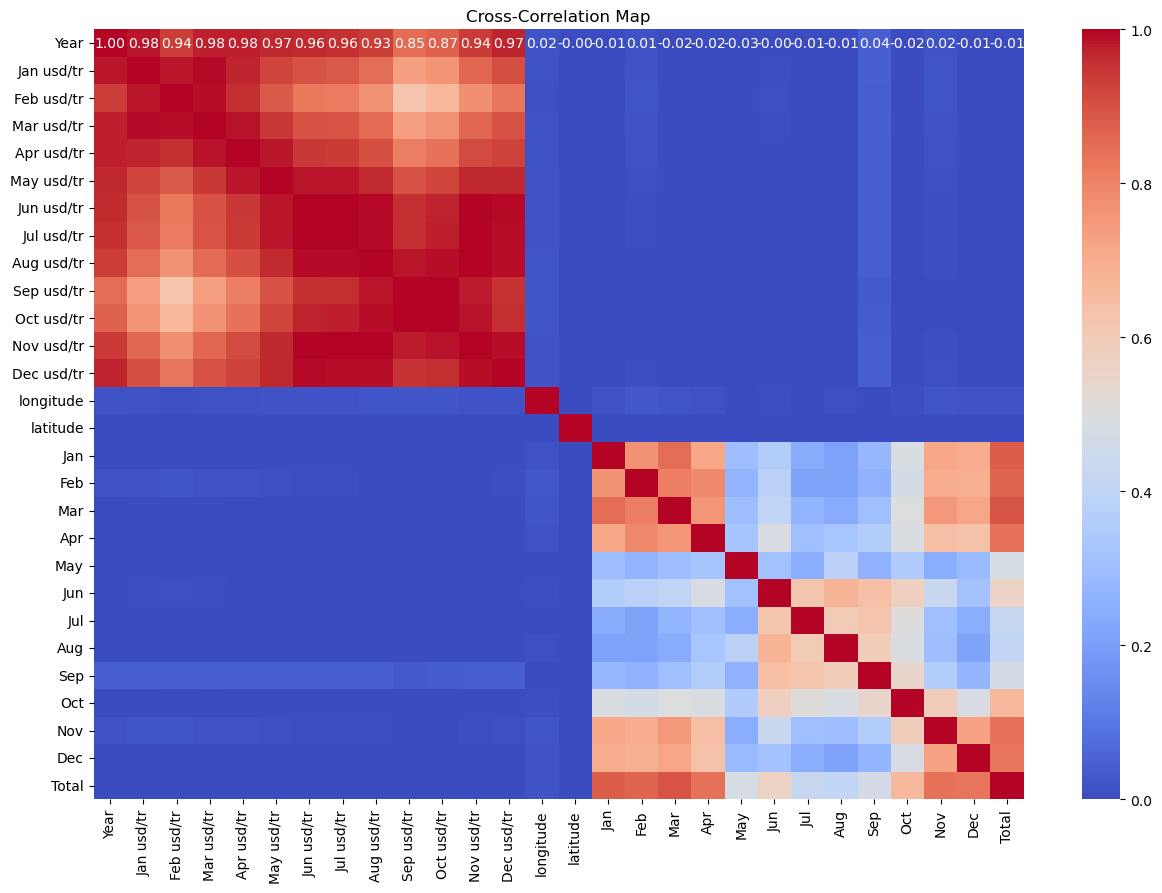

In [5]:
numeric_df = df.select_dtypes(include=['float64', 'int64', "int32"])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('Cross-Correlation Map')
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

df = df.dropna()
X , y = df.drop(columns=["Year","Total"]), df["Total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Linear Regression Test R-squared:", r2)


y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print("Linear Regression Train R^2 Score:", r2_train)
print("------------------------------")

model_random_forest = RandomForestRegressor(n_estimators=20, min_samples_split=2)
model_random_forest.fit(X_train, y_train)

y_pred_rf = model_random_forest.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Test R^2 Score:", r2_rf)

y_pred_rf_train = model_random_forest.predict(X_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
print("Random Forest Train R^2 Score:", r2_rf_train)

model_gb = GradientBoostingRegressor(n_estimators=80, min_samples_split=2)
model_gb.fit(X_train, y_train)

print("------------------------------")
y_pred_gb = model_gb.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Test R^2 Score:", r2_gb)

y_pred_gb_train = model_gb.predict(X_train)
r2_gb_train = r2_score(y_train, y_pred_gb_train)
print("Gradient Boosting Train R^2 Score:", r2_gb_train)


Linear Regression Test R-squared: 1.0
Linear Regression Train R^2 Score: 1.0
------------------------------
Random Forest Test R^2 Score: 0.9905406285790618
Random Forest Train R^2 Score: 0.9927714643368053
------------------------------
Gradient Boosting Test R^2 Score: 0.9901525381385884
Gradient Boosting Train R^2 Score: 0.9964645277055614
